
## 🖼️ Procesamiento de Imágenes: Dataset MNIST
### Guía paso a paso sin redes neuronales

### 1. Descarga y Carga del Dataset
# Usaremos `sklearn` para cargar el dataset digits (similar a MNIST pero más simple)

In [1]:
# %%
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
digits = load_digits()
print("Dataset cargado exitosamente!")

Dataset cargado exitosamente!


In [2]:
# Ver estructura del dataset
print(f"\nTipo de dato: {type(digits)}")
print(f"Número de imágenes: {len(digits.images)}")
print(f"Tamaño de cada imagen: {digits.images[0].shape}")
print(f"Formato de las imágenes: {digits.images.shape}")
print(f"Formato de las etiquetas: {digits.target.shape}")


Tipo de dato: <class 'sklearn.utils._bunch.Bunch'>
Número de imágenes: 1797
Tamaño de cada imagen: (8, 8)
Formato de las imágenes: (1797, 8, 8)
Formato de las etiquetas: (1797,)



## 2. Inspección de los Datos
# Veamos cómo son los datos internamente


# Mostrar algunos ejemplos de datos crudos

In [3]:

print("Primeras 3 imágenes (formato plano):")
print(digits.images[:3].reshape(3, -1))

print("\nEtiquetas correspondientes:")
print(digits.target[:3])


Primeras 3 imágenes (formato plano):
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]

Etiquetas correspondientes:
[0 1 2]



## 3. Visualización de Imágenes
# Veamos cómo se ven realmente las imágenes


# Función para mostrar múltiples imágenes

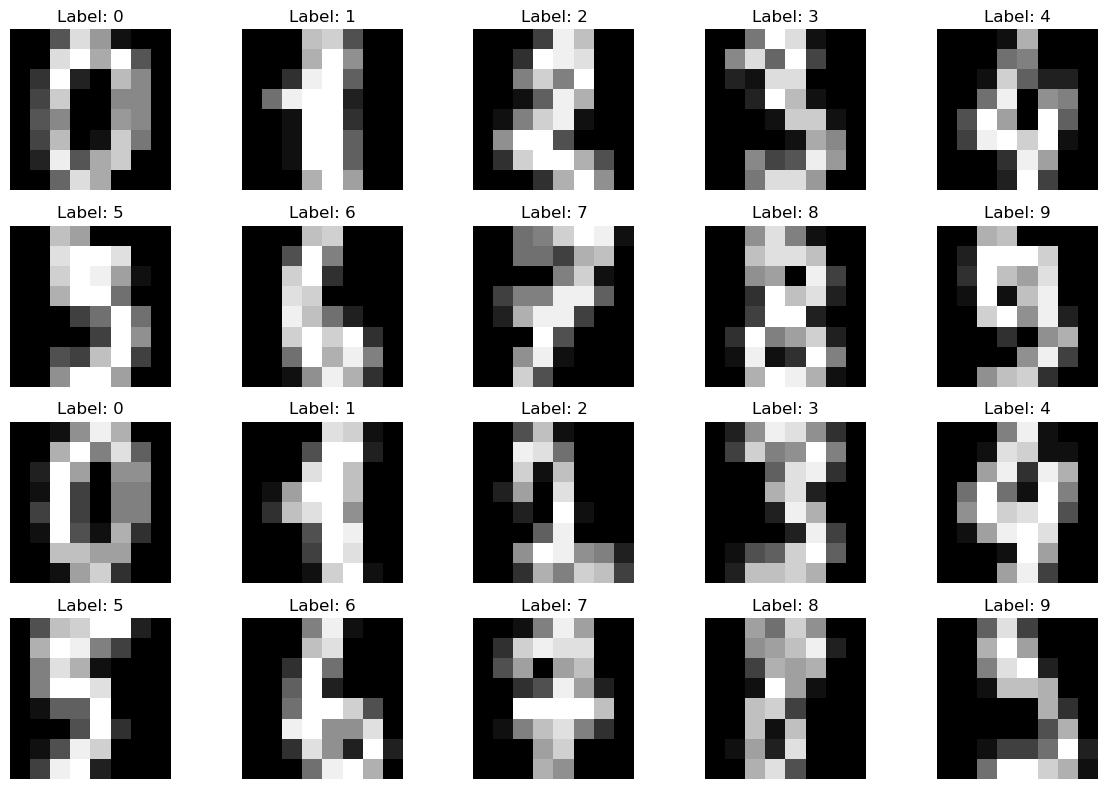

In [4]:
def plot_digits(images, labels, n_rows=4, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(f"Label: {labels[i]}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar primeras 20 imágenes
plot_digits(digits.images, digits.target)

## 4. Análisis Estadístico Básico
Veamos algunas propiedades interesantes de las imágenes

# Calcular promedio de píxeles por dígito

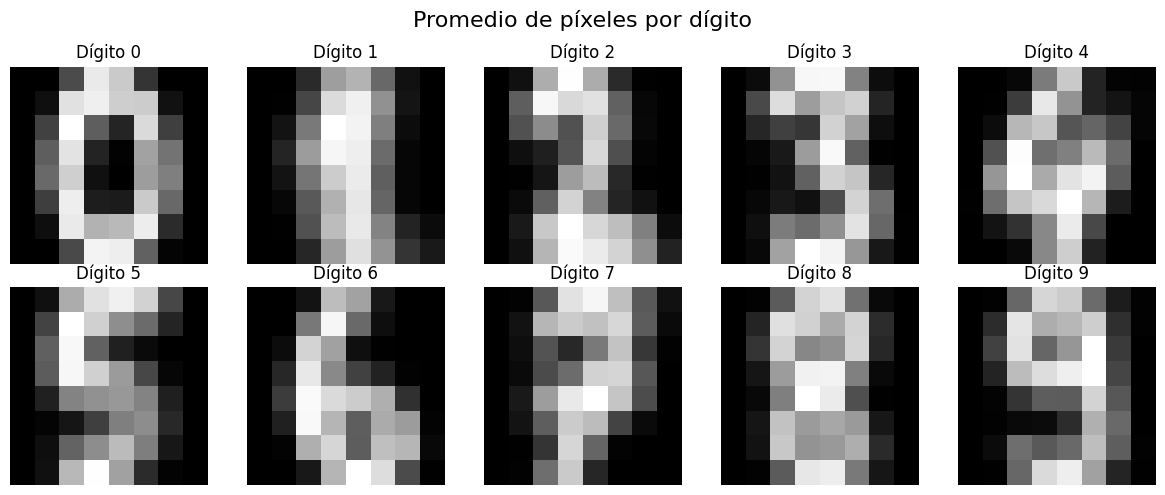

In [7]:
digit_means = {}
for digit in range(10):
    digit_imgs = digits.images[digits.target == digit]
    digit_means[digit] = np.mean(digit_imgs, axis=0)

# Mostrar promedios
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for digit, ax in zip(range(10), axes.flat):
    ax.imshow(digit_means[digit], cmap='gray')
    ax.set_title(f"Dígito {digit}")
    ax.axis('off')
plt.suptitle("Promedio de píxeles por dígito", fontsize=16)
plt.tight_layout()
plt.show()

## 5. Preprocesamiento Básico
Vamos a realizar algunas operaciones comunes sin redes neuronales


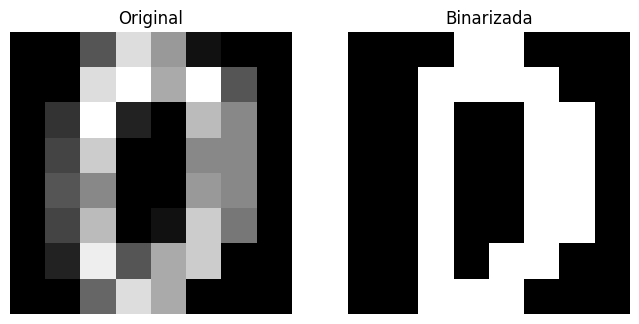

In [8]:
from skimage.filters import threshold_otsu
from skimage.transform import resize

# Ejemplo: Umbralización (binarización)
def binarize_image(img, threshold=None):
    """Convierte imagen a blanco y negro"""
    if threshold is None:
        threshold = threshold_otsu(img)
    return img > threshold

# Aplicar a una imagen de muestra
sample_img = digits.images[0]
binary_img = binarize_image(sample_img)

# Mostrar resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(sample_img, cmap='gray')
ax1.set_title("Original")
ax1.axis('off')

ax2.imshow(binary_img, cmap='gray')
ax2.set_title("Binarizada")
ax2.axis('off')
plt.show()

## 6. Extracción de Características
Sin redes neuronales, podemos extraer características manuales


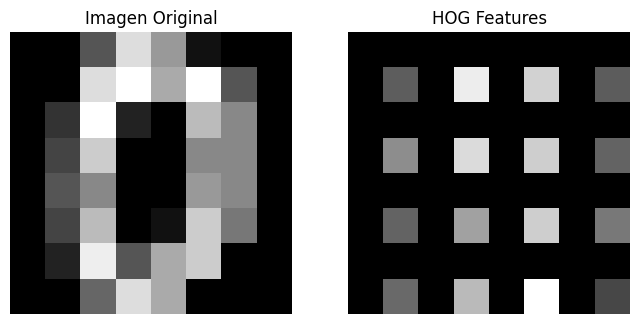

In [9]:
# %%
from skimage.feature import hog
from skimage.measure import moments, moments_hu

# Extraer HOG features (Histogram of Oriented Gradients)
def extract_hog_features(image):
    fd, hog_image = hog(
        image,
        orientations=8,
        pixels_per_cell=(2, 2),
        cells_per_block=(1, 1),
        visualize=True,
        block_norm='L2-Hys'
    )
    return fd, hog_image

# Aplicar a una imagen
hog_feat, hog_img = extract_hog_features(sample_img)

# Mostrar HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(sample_img, cmap='gray')
ax1.set_title("Imagen Original")
ax1.axis('off')

ax2.imshow(hog_img, cmap='gray')
ax2.set_title("HOG Features")
ax2.axis('off')
plt.show()

## 7. Transformaciones Geométricas
Rotación, escalado, traslación

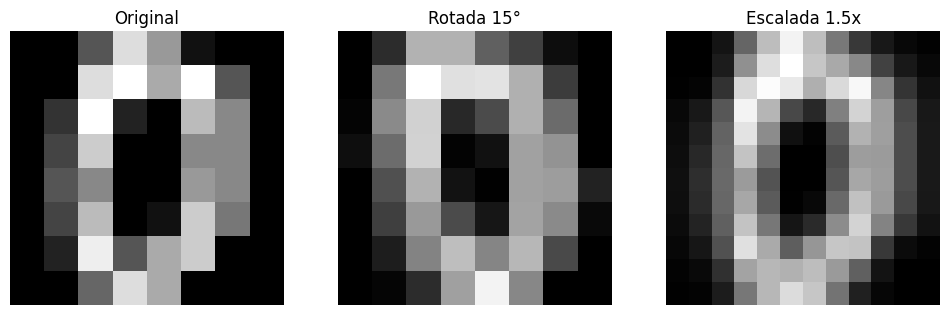

In [10]:
from skimage.transform import rotate, rescale

# Rotar imagen
rotated = rotate(sample_img, angle=15)

# Escalar imagen
scaled = rescale(sample_img, scale=1.5)

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(sample_img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(rotated, cmap='gray')
axes[1].set_title("Rotada 15°")
axes[1].axis('off')

axes[2].imshow(scaled, cmap='gray')
axes[2].set_title("Escalada 1.5x")
axes[2].axis('off')
plt.show()

## 8. Detección de Bordes
Usando operadores como Sobel

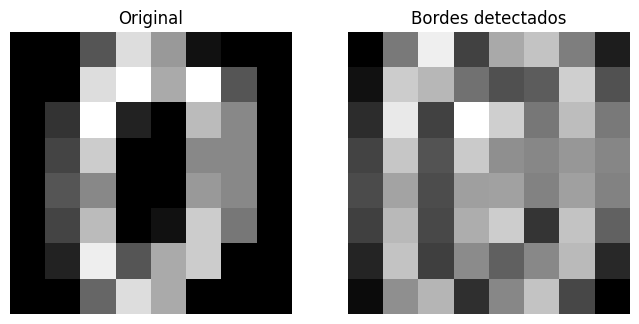

In [11]:
# %%
from skimage.filters import sobel

# Detectar bordes con Sobel
edges = sobel(sample_img)

# Mostrar resultado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(sample_img, cmap='gray')
ax1.set_title("Original")
ax1.axis('off')

ax2.imshow(edges, cmap='gray')
ax2.set_title("Bordes detectados")
ax2.axis('off')
plt.show()

## 9. Ejercicios Prácticos
Ahora tú puedes probar:

In [12]:
# ### Ejercicio 1:
# Crea una función que calcule el número de píxeles blancos (valor alto) en cada imagen y compara con la etiqueta real

# %%
def count_white_pixels(img):
    """Cuenta píxeles con valor alto (casi blanco)"""
    return np.sum(img > 15)  # Umbral arbitrario

# Probar con algunas imágenes
for i in range(5):
    white_count = count_white_pixels(digits.images[i])
    print(f"Imagen {i}: {white_count} píxeles blancos, etiqueta: {digits.target[i]}")

Imagen 0: 0 píxeles blancos, etiqueta: 0
Imagen 1: 11 píxeles blancos, etiqueta: 1
Imagen 2: 7 píxeles blancos, etiqueta: 2
Imagen 3: 0 píxeles blancos, etiqueta: 3
Imagen 4: 5 píxeles blancos, etiqueta: 4


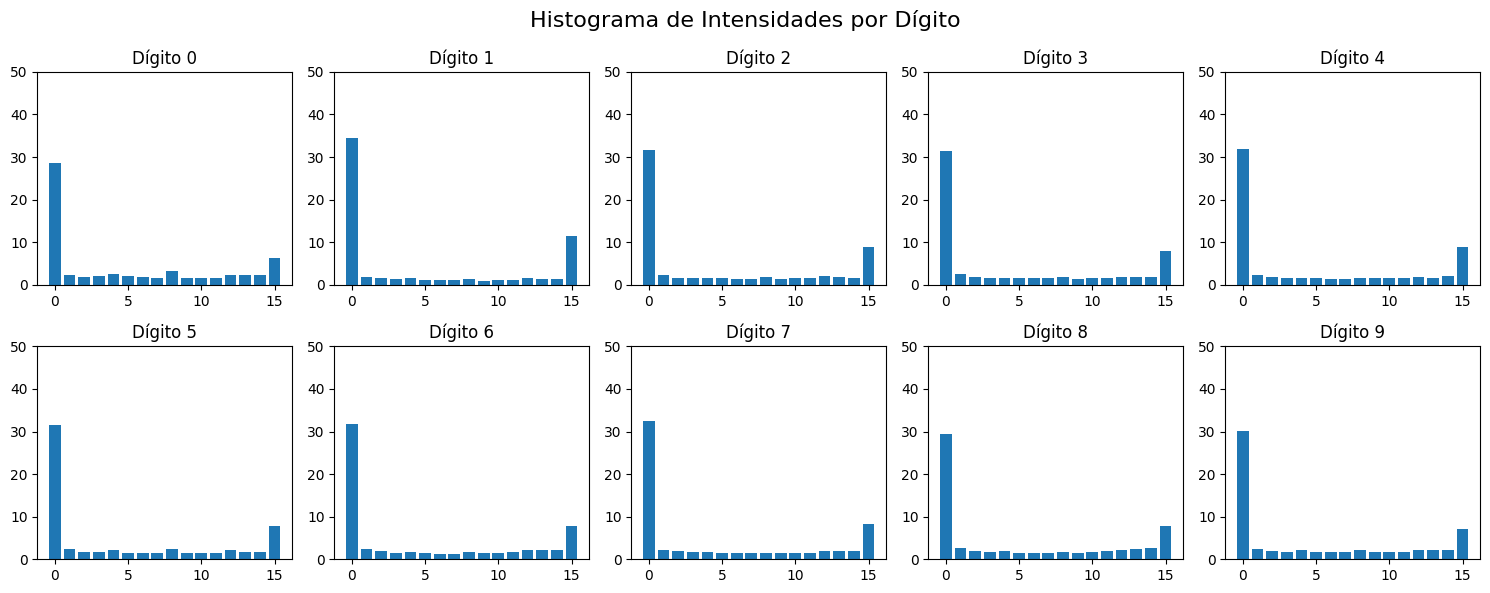

In [13]:
# ### Ejercicio 3:
# Calcula y visualiza el histograma de intensidades para cada dígito

# %%
# Crear figura con subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for digit in range(10):
    digit_imgs = digits.images[digits.target == digit]
    # Promediar histogramas de todas las imágenes del dígito
    hist_sum = np.zeros(16)
    for img in digit_imgs:
        hist, _ = np.histogram(img.ravel(), bins=16, range=(0, 16))
        hist_sum += hist

    axes[digit].bar(range(16), hist_sum / len(digit_imgs))
    axes[digit].set_title(f"Dígito {digit}")
    axes[digit].set_ylim(0, 50)

plt.suptitle("Histograma de Intensidades por Dígito", fontsize=16)
plt.tight_layout()
plt.show()